# CNN : Digit Recognition

## Importing libraries

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

## Data Preparation

In [13]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [14]:
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

In [15]:
X_train /= 255.0
X_test /= 255.0

In [16]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

## Model Building

### Loading the model

In [17]:
model = Sequential([
    Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(64,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),

    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])

### Model Compilation

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Model Training

In [19]:
history = model.fit(X_train,y_train,
                   epochs = 10,
                   batch_size=32,
                   validation_split=0.2,
                   verbose=1)

Epoch 1/10


1500/1500 [==============================] - 53s 32ms/step - loss: 0.2911 - accuracy: 0.9085 - val_loss: 0.0696 - val_accuracy: 0.9797
Epoch 2/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.1135 - accuracy: 0.9667 - val_loss: 0.0513 - val_accuracy: 0.9843
Epoch 3/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0839 - accuracy: 0.9750 - val_loss: 0.0410 - val_accuracy: 0.9882
Epoch 4/10
1500/1500 [==============================] - 47s 32ms/step - loss: 0.0738 - accuracy: 0.9779 - val_loss: 0.0391 - val_accuracy: 0.9885
Epoch 5/10
1500/1500 [==============================] - 23s 16ms/step - loss: 0.0615 - accuracy: 0.9816 - val_loss: 0.0401 - val_accuracy: 0.9889
Epoch 6/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0564 - accuracy: 0.9822 - val_loss: 0.0387 - val_accuracy: 0.9887
Epoch 7/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0519 - accuracy: 0.9842 - val_loss: 0.0354

### Model Evaluation

In [20]:
test_loss,test_accuracy = model.evaluate(X_test,y_test,verbose=0)
print(f"Test Accuracy : {test_accuracy*100:.2f}%")

Test Accuracy : 99.11%


## Visualization

In [21]:
import matplotlib.pyplot as plt

### Accuracy Plots

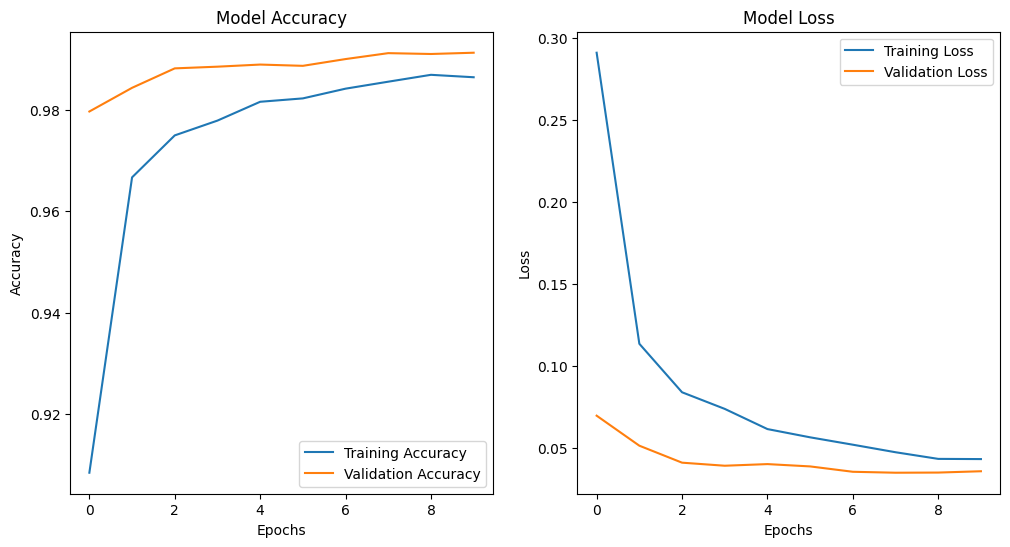

In [24]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label="Training Accuracy")
plt.plot(history.history['val_accuracy'],label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label="Training Loss")
plt.plot(history.history['val_loss'],label="Validation Loss")
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Prediction Plot


In [23]:
predictions = model.predict(X_test)
y_pred = predictions.argmax(axis=1)
y_true = y_test.argmax(axis=1)

313/313 [==============================] - 2s 4ms/step


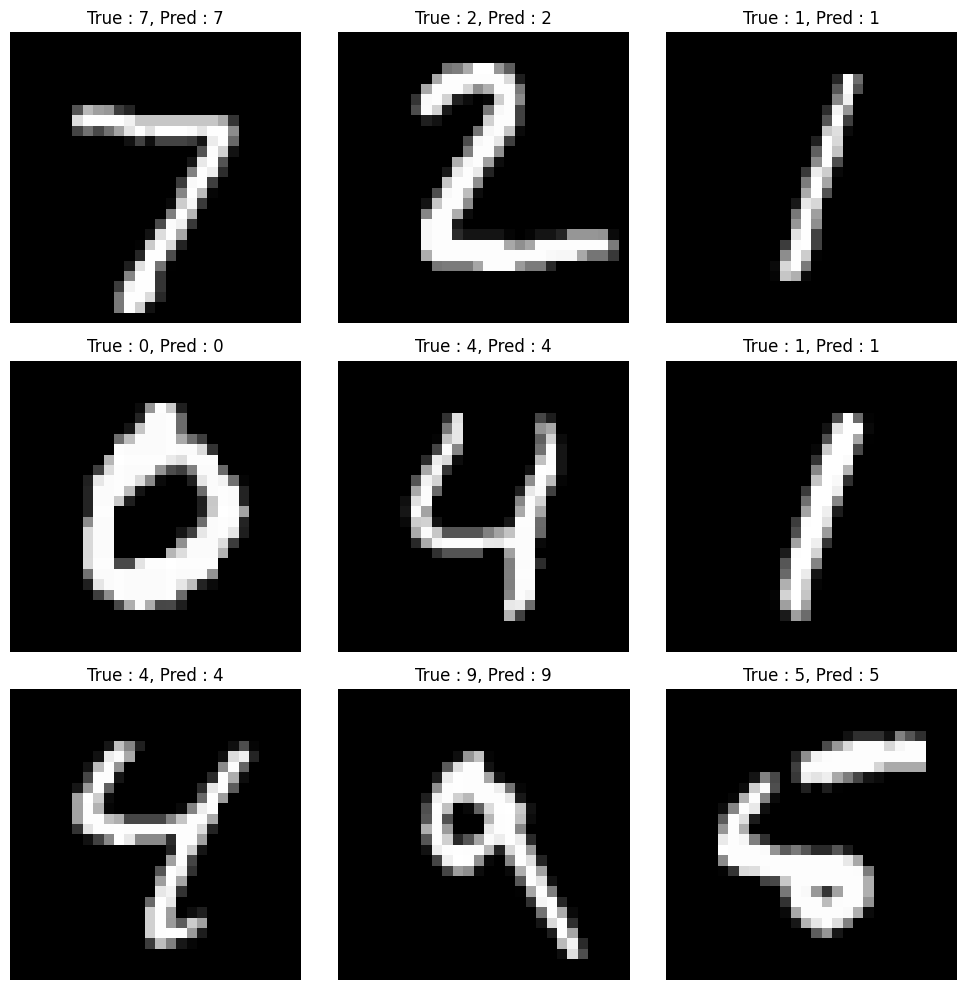

In [28]:
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i].reshape(28,28),cmap='gray')
    plt.title(f"True : {y_true[i]}, Pred : {y_pred[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()